<a href="https://colab.research.google.com/github/tvaditya/intro_ds_and_ml/blob/main/Classifica%C3%A7%C3%A3o_bin%C3%A1ria_Cancer_de_mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1: Classificação binária: Câncer de mama

## Etapa 1: Importação das bibliotecas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# !pip install torch==1.4.0

import torch
torch.__version__


'1.10.0+cu111'

In [3]:
import torch.nn as nn

## Etapa 2: Base de dados

In [4]:
np.random.seed(123)
torch.manual_seed(123)

In [5]:
previsores = pd.read_csv('/content/entradas_breast.csv')
classe = pd.read_csv('/content/saidas_breast.csv')

In [6]:
previsores.shape

(569, 30)

In [7]:
previsores.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1095.0000,0.9053,8589.0,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3398.0,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4585.0,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1156.0000,3445.0,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,0.7572,0.7813,5438.0,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [8]:
classe.head()

,0
0,0
1,0
2,0
3,0
4,0


In [9]:
np.unique(classe)

array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


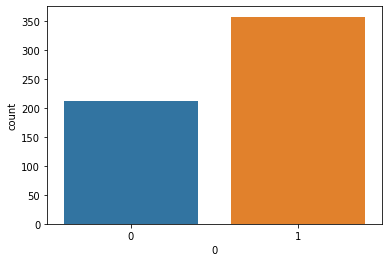

In [10]:
 sns.countplot(classe['0']);

In [11]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,
                                                                                              classe,
                                                                                              test_size = 0.25)

In [12]:
previsores_treinamento.shape

(426, 30)

In [13]:
classe_treinamento.shape

(426, 1)

In [14]:
previsores_teste.shape

(143, 30)

In [15]:
classe_teste.shape

(143, 1)

## Etapa 3: Transformação dos dados para tensores


In [16]:
type(previsores_treinamento)

pandas.core.frame.DataFrame

In [17]:
type(np.array(previsores_treinamento))

numpy.ndarray

In [18]:
previsores_treinamento = torch.tensor(np.array(previsores_treinamento), dtype=torch.float)
classe_treinamento = torch.tensor(np.array(classe_treinamento), dtype = torch.float)

In [19]:

type(previsores_treinamento)

torch.Tensor

In [20]:

type(classe_treinamento)

torch.Tensor

In [21]:
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)

In [22]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [23]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

## Etapa 4: Construção do modelo

In [24]:
 # 30 -> 16 -> 16 -> 1
# (entradas + saida) / 2 = (30 + 1) / 2 = 16
classificador = nn.Sequential(
    nn.Linear(in_features=30, out_features=16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

In [25]:
classificador.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [26]:
criterion = nn.BCELoss() #Binary Cross Entropy Loss

In [27]:
optimizer = torch.optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)

## Etapa 5: Treinamento do modelo

In [28]:
for epoch in range(100):
  running_loss = 0.

  for data in train_loader:
    inputs, labels = data
    #print(inputs)
    #print('-----')
    #print(labels)
    optimizer.zero_grad()

    outputs = classificador(inputs) # classificador.forward(inputs)
    #print(outputs)
    loss = criterion(outputs, labels)
    #print(loss)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print('Época %3d: perda %.5f' % (epoch+1, running_loss/len(train_loader)))

Época   1: perda 10.78336
Época   2: perda 2.84863
Época   3: perda 1.67480
Época   4: perda 1.11414
Época   5: perda 0.63996
Época   6: perda 0.63753
Época   7: perda 0.58066
Época   8: perda 0.55460
Época   9: perda 0.55617
Época  10: perda 0.53322
Época  11: perda 0.55797
Época  12: perda 0.53816
Época  13: perda 0.52938
Época  14: perda 0.33227
Época  15: perda 0.51360
Época  16: perda 0.35532
Época  17: perda 0.49602
Época  18: perda 0.33208
Época  19: perda 0.29349
Época  20: perda 0.25046
Época  21: perda 0.29527
Época  22: perda 0.49888
Época  23: perda 0.47241
Época  24: perda 0.45883
Época  25: perda 0.27544
Época  26: perda 0.23399
Época  27: perda 0.26373
Época  28: perda 0.24136
Época  29: perda 0.28275
Época  30: perda 0.22633
Época  31: perda 0.19294
Época  32: perda 0.22258
Época  33: perda 0.20290
Época  34: perda 0.20888
Época  35: perda 0.20335
Época  36: perda 0.20316
Época  37: perda 0.18855
Época  38: perda 0.22316
Época  39: perda 0.23315
Época  40: perda 0.19261

## Etapa 6: Visualização dos pesos

In [29]:
# 30 -> 16 -> 16 -> 1
params = list(classificador.parameters())

In [30]:
params

[Parameter containing:
 tensor([[-6.8758e-02, -4.5974e-02, -1.6881e-01,  5.1889e-02, -1.5407e-01,
           9.6941e-02, -1.3697e-01, -1.2676e-01, -2.2155e-01,  1.6481e-01,
          -3.7779e-02,  5.3912e-02, -1.2468e-01, -1.1436e-01, -1.3912e-03,
          -2.1398e-01, -3.9141e-01,  6.5978e-04, -6.6723e-03,  1.4566e-03,
           1.4102e-01, -2.0637e-02, -2.8877e-02,  1.4110e-01,  4.9312e-01,
           1.3069e-01, -1.8659e-01,  4.4318e-02,  2.9165e-01,  3.7982e-02],
         [ 1.9542e-01,  2.0732e-01,  2.8639e-01,  9.7069e-02, -1.3307e-01,
          -8.0457e-02, -6.7914e-02, -1.2084e-01, -2.8640e-02,  2.6983e-01,
          -6.2204e-02, -9.1055e-02, -7.9371e-03,  1.6734e-01, -7.2613e-03,
          -9.6179e-02, -1.1189e-02,  1.8739e-01,  1.0368e-01, -1.7496e-02,
           9.8523e-02,  6.1815e-02,  1.8995e-01,  7.5789e-03, -1.5083e-02,
          -2.4596e-01, -1.7552e-01, -7.0061e-03, -6.5762e-02, -1.6863e-01],
         [-1.2082e-02, -4.2609e-02, -2.4278e-01, -1.0345e-01, -8.2591e-03,


In [31]:
# 30 -> 16 -> 16 -> 1
pesos0 = params[0]
pesos0.shape

torch.Size([16, 30])

In [32]:
print(pesos0)

Parameter containing:
tensor([[-6.8758e-02, -4.5974e-02, -1.6881e-01,  5.1889e-02, -1.5407e-01,
          9.6941e-02, -1.3697e-01, -1.2676e-01, -2.2155e-01,  1.6481e-01,
         -3.7779e-02,  5.3912e-02, -1.2468e-01, -1.1436e-01, -1.3912e-03,
         -2.1398e-01, -3.9141e-01,  6.5978e-04, -6.6723e-03,  1.4566e-03,
          1.4102e-01, -2.0637e-02, -2.8877e-02,  1.4110e-01,  4.9312e-01,
          1.3069e-01, -1.8659e-01,  4.4318e-02,  2.9165e-01,  3.7982e-02],
        [ 1.9542e-01,  2.0732e-01,  2.8639e-01,  9.7069e-02, -1.3307e-01,
         -8.0457e-02, -6.7914e-02, -1.2084e-01, -2.8640e-02,  2.6983e-01,
         -6.2204e-02, -9.1055e-02, -7.9371e-03,  1.6734e-01, -7.2613e-03,
         -9.6179e-02, -1.1189e-02,  1.8739e-01,  1.0368e-01, -1.7496e-02,
          9.8523e-02,  6.1815e-02,  1.8995e-01,  7.5789e-03, -1.5083e-02,
         -2.4596e-01, -1.7552e-01, -7.0061e-03, -6.5762e-02, -1.6863e-01],
        [-1.2082e-02, -4.2609e-02, -2.4278e-01, -1.0345e-01, -8.2591e-03,
          4.95

In [33]:
# 30 -> 16 -> 16 -> 1
bias0 = params[1]
bias0.shape

torch.Size([16])

In [34]:
pesos1 = params[2]
pesos1.shape

torch.Size([16, 16])

In [35]:
bias1 = params[3]
bias1.shape

torch.Size([16])

## Etapa 7: Avaliação do modelo

In [36]:
classificador.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [37]:
type(previsores_teste)

pandas.core.frame.DataFrame

In [38]:
previsores_teste = torch.tensor(np.array(previsores_teste), dtype=torch.float)

In [39]:
type(previsores_teste)

torch.Tensor

In [40]:
previsoes = classificador.forward(previsores_teste)

In [41]:
previsoes

tensor([[9.9383e-01],
        [1.0000e+00],
        [3.1412e-01],
        [9.4383e-01],
        [1.3290e-04],
        [8.4746e-01],
        [9.4431e-01],
        [9.9988e-01],
        [6.2488e-01],
        [6.5691e-01],
        [9.1439e-01],
        [9.9876e-01],
        [6.7283e-01],
        [9.9518e-01],
        [9.9706e-01],
        [8.6089e-01],
        [9.9605e-01],
        [1.0000e+00],
        [2.9267e-01],
        [9.9612e-01],
        [7.4813e-10],
        [1.0656e-02],
        [5.8519e-01],
        [1.0000e+00],
        [9.0273e-01],
        [4.2905e-03],
        [8.2606e-01],
        [1.0000e+00],
        [1.8561e-04],
        [9.9753e-01],
        [5.3080e-01],
        [9.9999e-01],
        [9.2115e-01],
        [9.8746e-01],
        [4.5453e-01],
        [9.9757e-01],
        [6.0572e-01],
        [9.9787e-01],
        [9.9748e-01],
        [4.9014e-05],
        [6.0460e-03],
        [9.2253e-01],
        [1.5413e-07],
        [4.1097e-01],
        [7.4316e-05],
        [7

In [42]:
previsoes = np.array(previsoes > 0.5)
previsoes

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [43]:
classe_teste

,0
333,1
273,1
201,0
178,1
85,0
...,...
230,0
282,0
535,0
436,1


In [44]:
taxa_acerto = accuracy_score(classe_teste, previsoes)
taxa_acerto

0.9020979020979021

In [45]:
matriz = confusion_matrix(classe_teste, previsoes)
matriz

array([[43, 11],
       [ 3, 86]])

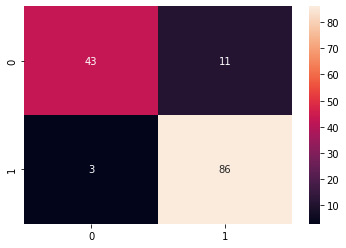

In [46]:
sns.heatmap(matriz, annot=True);

# Validação cruzada e Skorch

In [47]:
# importar o skorch , que é scikit learn + pytorch
!pip install skorch

In [48]:
from skorch import NeuralNetBinaryClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

# Criar a estrutura da rede neural

In [49]:
class classificador_torch(nn.Module):
  def __init__(self):
    super().__init__()

    # 30 -> 16 -> 16 -> 1
    self.dense0 = nn.Linear(30, 16)
    torch.nn.init.uniform_(self.dense0.weight)
    self.activation0 = nn.ReLU()
    self.dense1 = nn.Linear(16, 16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()
    self.dense2 = nn.Linear(16, 1)
    torch.nn.init.uniform_(self.dense2.weight)
    # self.output = nn.Sigmoid() 

  def forward(self, X):
    X = self.dense0(X)
    X = self.activation0(X)
    X = self.dense1(X)
    X = self.activation1(X)
    X = self.dense2(X)
    # X = self.output(X) 
    return X

# Skorch, convertendo de PyTorch + Sklearn

In [50]:
previsores = np.array(previsores, dtype='float32')
classe = np.array(classe, dtype='float32').squeeze(1)

In [51]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  criterion=torch.nn.BCEWithLogitsLoss, # ** ATUALIZAÇÃO **
                                                  optimizer=torch.optim.Adam,
                                                  lr=0.001,
                                                  optimizer__weight_decay=0.0001,
                                                  max_epochs=100,
                                                  batch_size=10,
                                                  train_split=False)

# Validação cruzada

In [52]:
resultados = cross_val_score(classificador_sklearn, previsores, classe, cv = 10, scoring = 'accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1   118945.4298  0.0650
      2    96306.6813  0.0680
      3    76948.1390  0.0678
      4    61005.2824  0.0849
      5    47964.5737  0.0666
      6    37257.7034  0.0763
      7    28374.2056  0.0673
      8    20867.2861  0.0667
      9    14361.3472  0.0679
     10     8525.1316  0.0684
     11     3337.3645  0.0782
     12      406.6355  0.0793
     13      127.1227  0.0789
     14       90.8128  0.0687
     15       85.3662  0.0686
     16       73.6475  0.0722
     17       62.4910  0.0672
     18       48.6342  0.0761
     19       41.6262  0.0664
     20       43.0964  0.0841
     21       43.3950  0.0678
     22       39.8347  0.0712
     23       31.6974  0.0674
     24       29.0732  0.0713
     25       30.8460  0.0684
     26       27.3363  0.0722
     27       22.3035  0.0680
     28       19.5539  0.0736
     29       19.8370  0.0681
     30       16.0502  0.0691
     31       18.6731  0.0708
     32   

In [53]:
resultados.shape

(10,)

In [54]:
resultados

array([0.85964912, 0.80701754, 0.87719298, 0.9122807 , 0.85964912,
       0.9122807 , 0.8245614 , 0.85964912, 0.78947368, 0.76785714])

In [55]:
media = resultados.mean()
media

0.8469611528822055

In [56]:
desvio = resultados.std()
desvio

0.04646471599140423

# Adicionando a camada de Dropout

In [57]:
class classificador_torch(nn.Module):
  def __init__(self):
    super().__init__()

    # 30 -> 16 -> 16 -> 1
    self.dense0 = nn.Linear(30, 16)
    torch.nn.init.uniform_(self.dense0.weight)
    self.activation0 = nn.ReLU()
    self.dropout0 = nn.Dropout(0.2)
    self.dense1 = nn.Linear(16, 16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()
    self.dropout1 = nn.Dropout(0.2)
    self.dense2 = nn.Linear(16, 1)
    torch.nn.init.uniform_(self.dense2.weight)
    # self.output = nn.Sigmoid() 

  def forward(self, X):
    X = self.dense0(X)
    X = self.activation0(X)
    X = self.dropout0(X)
    X = self.dense1(X)
    X = self.activation1(X)
    X = self.dropout1(X)
    X = self.dense2(X)
    # X = self.output(X) 
    return X

In [58]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  criterion=torch.nn.BCEWithLogitsLoss, # ** ATUALIZAÇÃO **
                                                  optimizer=torch.optim.Adam,
                                                  lr=0.001,
                                                  optimizer__weight_decay=0.0001,
                                                  max_epochs=100,
                                                  batch_size=10,
                                                  train_split=False)

In [59]:
resultados = cross_val_score(classificador_sklearn, previsores, classe, cv = 10, scoring = 'accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1    90533.6142  0.0702
      2    70963.6339  0.0733
      3    56935.1206  0.0805
      4    43389.7627  0.0803
      5    34936.3036  0.0749
      6    27848.4043  0.0753
      7    20891.8739  0.0857
      8    14785.6921  0.0874
      9    10405.0327  0.0777
     10     6880.2532  0.0736
     11     3844.3898  0.0779
     12     2706.5926  0.0824
     13     1912.9335  0.0772
     14     1870.5745  0.0856
     15     1778.9524  0.0778
     16     1696.6795  0.0764
     17     1448.5837  0.0761
     18     1513.2154  0.0919
     19     1272.0964  0.0807
     20     1038.7577  0.0845
     21     1239.5739  0.0902
     22     1156.9341  0.0821
     23     1098.0364  0.0748
     24     1061.4441  0.0757
     25     1072.3421  0.0771
     26      936.0317  0.0777
     27      944.9657  0.0774
     28     1018.9457  0.0752
     29      719.4458  0.0824
     30      889.2458  0.0807
     31      717.1343  0.0771
     32   

In [60]:
media = resultados.mean()
desvio = resultados.std()
media, desvio

(0.6151315789473684, 0.05034554727581867)

In [61]:
resultados

array([0.63157895, 0.56140351, 0.61403509, 0.63157895, 0.66666667,
       0.66666667, 0.61403509, 0.49122807, 0.64912281, 0.625     ])

# GridSearch

In [62]:
import pandas as pd
import numpy as np
import sklearn
import skorch
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import GridSearchCV
from skorch import NeuralNetBinaryClassifier

In [63]:
torch.__version__, skorch.__version__, sklearn.__version__

('1.10.0+cu111', '0.11.0', '1.0.2')

In [64]:
np.random.seed(123)
torch.manual_seed(123)

In [65]:
previsores = pd.read_csv('entradas_breast.csv')
classe = pd.read_csv('saidas_breast.csv')

In [66]:
previsores = np.array(previsores, dtype = 'float32')
classe = np.array(classe, dtype = 'float32').squeeze(1)

In [67]:
previsores.shape, classe.shape

((569, 30), (569,))

In [68]:
class classificador_torch(nn.Module):
  def __init__(self, activation, neurons, initializer):
    super().__init__()
    # 30 -> 16 -> 16 -> 1
    self.dense0 = nn.Linear(30, neurons)
    initializer(self.dense0.weight)
    self.activation0 = activation
    self.dense1 = nn.Linear(neurons, neurons)
    initializer(self.dense1.weight)
    self.activation1 = activation
    self.dense2 = nn.Linear(neurons, 1)
    initializer(self.dense2.weight)
    # self.output = nn.Sigmoid() ** ATUALIZAÇÃO (ver detalhes no texto acima) **

  def forward(self, X):
    X = self.dense0(X)
    X = self.activation0(X)
    X = self.dense1(X)
    X = self.activation1(X)
    X = self.dense2(X)
    # X = self.output(X) ** ATUALIZAÇÃO (ver detalhes no texto acima) **
    return X

In [69]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  lr = 0.001,
                                                  optimizer__weight_decay = 0.0001,
                                                  train_split=False)

In [71]:
params = {'batch_size': [10],
          'max_epochs': [100],
          'optimizer': [torch.optim.Adam, torch.optim.SGD],
          'criterion': [torch.nn.BCEWithLogitsLoss], #, torch.nn.HingeEmbeddingLoss], # ** ATUALIZAÇÃO **
          'module__activation': [F.relu, F.tanh],
          'module__neurons': [8, 16], 
          'module__initializer': [torch.nn.init.uniform]} # _, torch.nn.init.normal_]}

In [72]:
grid_search = GridSearchCV(classificador_sklearn, params, scoring = 'accuracy', cv = 2)



In [73]:
grid_search = grid_search.fit(previsores, classe)

  epoch    train_loss     dur
-------  ------------  ------
      1    27299.8736  0.0408
      2    24343.2036  0.0393
      3    21607.9807  0.0386
      4    19135.1212  0.0387


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if sys.path[0] == '':


      5    16931.4985  0.0434
      6    14986.2365  0.0373
      7    13263.7471  0.0385
      8    11731.9747  0.0378
      9    10367.9509  0.0453
     10     9150.4847  0.0389
     11     8060.7277  0.0547
     12     7080.4200  0.0416
     13     6192.2920  0.0472
     14     5382.8836  0.0402
     15     4640.1404  0.0387
     16     3952.5611  0.0402
     17     3309.9055  0.0409
     18     2702.8676  0.0387
     19     2122.0805  0.0398
     20     1558.6191  0.0380
     21     1003.4047  0.0386
     22      478.4396  0.0411
     23      138.4233  0.0424
     24       90.7293  0.0399
     25       88.3919  0.0455
     26       77.7053  0.0469
     27       70.4368  0.0394
     28       64.3089  0.0399
     29       58.6982  0.0400
     30       54.5391  0.0451
     31       52.0841  0.0444
     32       48.6803  0.0411
     33       46.1666  0.0440
     34       44.8264  0.0402
     35       43.1170  0.0411
     36       41.1271  0.0521
     37       40.8539  0.0398
     38   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if sys.path[0] == '':


      5    12690.1410  0.0563
      6    11149.3161  0.0408
      7     9765.4888  0.0416
      8     8523.4363  0.0390
      9     7408.3096  0.0391
     10     6405.5098  0.0426
     11     5502.9312  0.0389
     12     4687.3060  0.0388
     13     3944.7730  0.0458
     14     3263.5492  0.0383
     15     2631.7705  0.0447
     16     2037.1366  0.0384
     17     1466.6371  0.0394
     18      907.2859  0.0402
     19      368.1897  0.0394
     20       70.2290  0.0388
     21       64.8931  0.0422
     22       41.8883  0.0403
     23       38.2925  0.0400
     24       34.4358  0.0431
     25       30.3832  0.0390
     26       28.4991  0.0384
     27       26.7977  0.0390
     28       27.0994  0.0383
     29       26.0353  0.0486
     30       24.2245  0.0404
     31       23.3312  0.0398
     32       23.0973  0.0395
     33       22.5641  0.0380
     34       22.1781  0.0483
     35       21.5842  0.0388
     36       20.8129  0.0391
     37       18.3122  0.0400
     38   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if sys.path[0] == '':


      6        0.6956  0.0326
      7        0.6951  0.0302
      8        0.6946  0.0312
      9        0.6942  0.0310
     10        0.6937  0.0330
     11        0.6933  0.0327
     12        0.6928  0.0335
     13        0.6924  0.0346
     14        0.6920  0.0348
     15        0.6916  0.0338
     16        0.6912  0.0308
     17        0.6907  0.0319
     18        0.6903  0.0319
     19        0.6900  0.0328
     20        0.6896  0.0351
     21        0.6892  0.0324
     22        0.6888  0.0327
     23        0.6884  0.0328
     24        0.6881  0.0319
     25        0.6877  0.0314
     26        0.6873  0.0357
     27        0.6870  0.0356
     28        0.6866  0.0330
     29        0.6863  0.0359
     30        0.6859  0.0315
     31        0.6856  0.0406
     32        0.6853  0.0326
     33        0.6850  0.0323
     34        0.6846  0.0330
     35        0.6843  0.0320
     36        0.6840  0.0387
     37        0.6837  0.0323
     38        0.6834  0.0322
     39   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if sys.path[0] == '':


      6        0.7215  0.0370
      7        0.7206  0.0343
      8        0.7197  0.0314
      9        0.7188  0.0307
     10        0.7179  0.0326
     11        0.7171  0.0356
     12        0.7162  0.0375
     13        0.7154  0.0308
     14        0.7146  0.0328
     15        0.7137  0.0348
     16        0.7129  0.0323
     17        0.7122  0.0320
     18        0.7114  0.0311
     19        0.7106  0.0409
     20        0.7099  0.0312
     21        0.7091  0.0325
     22        0.7084  0.0318
     23        0.7077  0.0286
     24        0.7070  0.0294
     25        0.7063  0.0343
     26        0.7056  0.0360
     27        0.7049  0.0313
     28        0.7042  0.0315
     29        0.7036  0.0318
     30        0.7029  0.0324
     31        0.7023  0.0349
     32        0.7016  0.0311
     33        0.7010  0.0306
     34        0.7004  0.0323
     35        0.6998  0.0340
     36        0.6992  0.0335
     37        0.6986  0.0303
     38        0.6980  0.0329
     39   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if sys.path[0] == '':


      5    40394.8710  0.0434
      6    34179.8138  0.0403
      7    28505.4649  0.0457
      8    23266.5548  0.0412
      9    18374.2070  0.0389
     10    13746.7662  0.0395
     11     9300.1456  0.0398
     12     4939.4478  0.0436
     13     1247.1756  0.0434
     14      178.5841  0.0401
     15      191.0518  0.0429
     16      261.4455  0.0403
     17      239.5685  0.0393
     18      236.6770  0.0397
     19      238.6056  0.0432
     20      230.9263  0.0405
     21      223.7866  0.0497
     22      220.1303  0.0390
     23      216.8515  0.0426
     24      204.7685  0.0422
     25      190.7831  0.0382
     26      207.1947  0.0396
     27      196.0289  0.0402
     28      195.7725  0.0400
     29      193.2576  0.0393
     30      182.9705  0.0419
     31      187.2862  0.0404
     32      188.7603  0.0424
     33      179.0847  0.0400
     34      166.9800  0.0404
     35      164.1641  0.0454
     36      169.1446  0.0403
     37      161.6580  0.0409
     38   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if sys.path[0] == '':


      5    50579.8093  0.0428
      6    44267.9956  0.0397
      7    38596.0506  0.0444
      8    33501.1268  0.0405
      9    28921.3993  0.0395
     10    24799.2329  0.0396
     11    21079.1079  0.0395
     12    17714.4093  0.0416
     13    14659.1855  0.0368
     14    11855.1438  0.0508
     15     9243.7294  0.0406
     16     6774.6104  0.0406
     17     4394.2049  0.0399
     18     2069.4893  0.0402
     19      403.7687  0.0407
     20      196.6151  0.0444
     21      207.4296  0.0404
     22      195.5400  0.0402
     23      190.5075  0.0398
     24      182.9866  0.0432
     25      175.7260  0.0401
     26      167.0982  0.0400
     27      157.2590  0.0387
     28      146.7474  0.0405
     29      142.1947  0.0398
     30      141.3887  0.0400
     31      138.5335  0.0396
     32      129.9566  0.0446
     33      133.7136  0.0461
     34      127.4330  0.0389
     35      123.2514  0.0400
     36      122.0910  0.0405
     37      116.1482  0.0452
     38   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if sys.path[0] == '':


      6        0.6717  0.0361
      7        0.6716  0.0330
      8        0.6714  0.0423
      9        0.6713  0.0326
     10        0.6711  0.0323
     11        0.6710  0.0322
     12        0.6709  0.0347
     13        0.6708  0.0318
     14        0.6706  0.0377
     15        0.6705  0.0316
     16        0.6704  0.0315
     17        0.6703  0.0316
     18        0.6701  0.0324
     19        0.6700  0.0324
     20        0.6699  0.0315
     21        0.6698  0.0316
     22        0.6697  0.0320
     23        0.6696  0.0305
     24        0.6695  0.0307
     25        0.6694  0.0322
     26        0.6692  0.0323
     27        0.6691  0.0359
     28        0.6690  0.0291
     29        0.6689  0.0314
     30        0.6688  0.0337
     31        0.6687  0.0319
     32        0.6686  0.0308
     33        0.6685  0.0304
     34        0.6684  0.0324
     35        0.6683  0.0406
     36        0.6683  0.0489
     37        0.6682  0.0345
     38        0.6681  0.0312
     39   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if sys.path[0] == '':


      6        0.7174  0.0466
      7        0.7165  0.0365
      8        0.7157  0.0338
      9        0.7149  0.0386
     10        0.7140  0.0323
     11        0.7132  0.0387
     12        0.7124  0.0330
     13        0.7117  0.0317
     14        0.7109  0.0325
     15        0.7101  0.0299
     16        0.7094  0.0322
     17        0.7086  0.0324
     18        0.7079  0.0360
     19        0.7072  0.0345
     20        0.7065  0.0388
     21        0.7058  0.0353
     22        0.7051  0.0355
     23        0.7044  0.0344
     24        0.7038  0.0351
     25        0.7031  0.0340
     26        0.7025  0.0329
     27        0.7019  0.0319
     28        0.7012  0.0314
     29        0.7006  0.0347
     30        0.7000  0.0337
     31        0.6994  0.0384
     32        0.6988  0.0316
     33        0.6982  0.0344
     34        0.6977  0.0321
     35        0.6971  0.0325
     36        0.6965  0.0326
     37        0.6960  0.0324
     38        0.6955  0.0321
     39   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      5        1.6472  0.0428
      6        1.5726  0.0399
      7        1.4901  0.0411
      8        1.3849  0.0386
      9        1.2230  0.0407
     10        0.9781  0.0406
     11        0.7669  0.0393
     12        0.6936  0.0437
     13        0.6770  0.0391
     14        0.6739  0.0398
     15        0.6731  0.0404
     16        0.6724  0.0399
     17        0.6719  0.0392
     18        0.6715  0.0400
     19        0.6712  0.0401
     20        0.6709  0.0484
     21        0.6707  0.0420
     22        0.6705  0.0403
     23        0.6704  0.0407
     24        0.6702  0.0396
     25        0.6701  0.0394
     26        0.6700  0.0460
     27        0.6699  0.0526
     28        0.6698  0.0404
     29        0.6697  0.0405
     30        0.6697  0.0397
     31        0.6696  0.0400
     32        0.6695  0.0393
     33        0.6695  0.0410
     34        0.6694  0.0460
     35        0.6694  0.0406
     36        0.6693  0.0408
     37        0.6693  0.0406
     38   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      5        1.2859  0.0411
      6        1.2117  0.0451
      7        1.1254  0.0503
      8        1.0169  0.0408
      9        0.8868  0.0410
     10        0.7715  0.0400
     11        0.7064  0.0414
     12        0.6806  0.0413
     13        0.6718  0.0407
     14        0.6686  0.0514
     15        0.6674  0.0407
     16        0.6667  0.0413
     17        0.6664  0.0393
     18        0.6661  0.0498
     19        0.6660  0.0401
     20        0.6658  0.0418
     21        0.6657  0.0408
     22        0.6656  0.0452
     23        0.6656  0.0409
     24        0.6655  0.0400
     25        0.6654  0.0397
     26        0.6654  0.0391
     27        0.6653  0.0435
     28        0.6653  0.0427
     29        0.6653  0.0397
     30        0.6652  0.0443
     31        0.6652  0.0393
     32        0.6652  0.0393
     33        0.6651  0.0394
     34        0.6651  0.0398
     35        0.6651  0.0389
     36        0.6651  0.0398
     37        0.6650  0.0432
     38   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      6        1.4093  0.0371
      7        1.3770  0.0430
      8        1.3452  0.0331
      9        1.3138  0.0330
     10        1.2829  0.0316
     11        1.2525  0.0412
     12        1.2227  0.0335
     13        1.1935  0.0327
     14        1.1650  0.0318
     15        1.1372  0.0322
     16        1.1100  0.0326
     17        1.0837  0.0346
     18        1.0581  0.0375
     19        1.0333  0.0319
     20        1.0094  0.0354
     21        0.9864  0.0313
     22        0.9642  0.0380
     23        0.9430  0.0320
     24        0.9228  0.0318
     25        0.9035  0.0310
     26        0.8851  0.0343
     27        0.8677  0.0312
     28        0.8513  0.0328
     29        0.8358  0.0327
     30        0.8213  0.0339
     31        0.8077  0.0344
     32        0.7949  0.0332
     33        0.7831  0.0327
     34        0.7721  0.0360
     35        0.7619  0.0368
     36        0.7525  0.0302
     37        0.7438  0.0311
     38        0.7358  0.0327
     39   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      6        1.3556  0.0357
      7        1.3257  0.0367
      8        1.2962  0.0331
      9        1.2672  0.0330
     10        1.2387  0.0329
     11        1.2107  0.0342
     12        1.1833  0.0403
     13        1.1565  0.0306
     14        1.1303  0.0331
     15        1.1048  0.0332
     16        1.0800  0.0326
     17        1.0559  0.0322
     18        1.0326  0.0338
     19        1.0100  0.0340
     20        0.9883  0.0315
     21        0.9673  0.0375
     22        0.9472  0.0357
     23        0.9280  0.0399
     24        0.9096  0.0334
     25        0.8920  0.0331
     26        0.8754  0.0333
     27        0.8596  0.0325
     28        0.8446  0.0318
     29        0.8305  0.0330
     30        0.8173  0.0345
     31        0.8048  0.0320
     32        0.7932  0.0327
     33        0.7823  0.0370
     34        0.7721  0.0336
     35        0.7627  0.0336
     36        0.7539  0.0389
     37        0.7458  0.0336
     38        0.7384  0.0335
     39   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      5        2.1681  0.0496
      6        2.0287  0.0419
      7        1.8666  0.0395
      8        1.5984  0.0458
      9        1.1698  0.0410
     10        0.8075  0.0413
     11        0.6951  0.0454
     12        0.6748  0.0439
     13        0.6708  0.0419
     14        0.6696  0.0418
     15        0.6690  0.0420
     16        0.6688  0.0424
     17        0.6686  0.0391
     18        0.6684  0.0417
     19        0.6684  0.0459
     20        0.6683  0.0402
     21        0.6682  0.0412
     22        0.6682  0.0545
     23        0.6682  0.0450
     24        0.6681  0.0455
     25        0.6681  0.0409
     26        0.6680  0.0414
     27        0.6680  0.0544
     28        0.6680  0.0410
     29        0.6679  0.0422
     30        0.6679  0.0464
     31        0.6678  0.0407
     32        0.6678  0.0402
     33        0.6677  0.0405
     34        0.6677  0.0408
     35        0.6676  0.0411
     36        0.6676  0.0402
     37        0.6676  0.0461
     38   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      5        1.7417  0.0454
      6        1.6123  0.0431
      7        1.4851  0.0404
      8        1.3601  0.0413
      9        1.2281  0.0394
     10        1.0634  0.0400
     11        0.8767  0.0416
     12        0.7321  0.0451
     13        0.6801  0.0410
     14        0.6709  0.0420
     15        0.6692  0.0410
     16        0.6686  0.0398
     17        0.6683  0.0411
     18        0.6680  0.0541
     19        0.6678  0.0441
     20        0.6677  0.0398
     21        0.6676  0.0418
     22        0.6672  0.0405
     23        0.6499  0.0404
     24        0.6893  0.0401
     25        0.6823  0.0401
     26        0.6777  0.0454
     27        0.6753  0.0399
     28        0.6739  0.0417
     29        0.6729  0.0401
     30        0.6721  0.0406
     31        0.6714  0.0411
     32        0.6707  0.0446
     33        0.6700  0.0391
     34        0.6694  0.0394
     35        0.6687  0.0412
     36        0.6681  0.0388
     37        0.6674  0.0401
     38   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      6        2.7181  0.0336
      7        2.6482  0.0381
      8        2.5785  0.0327
      9        2.5088  0.0310
     10        2.4391  0.0326
     11        2.3696  0.0324
     12        2.3002  0.0325
     13        2.2310  0.0375
     14        2.1619  0.0365
     15        2.0931  0.0398
     16        2.0245  0.0305
     17        1.9562  0.0317
     18        1.8883  0.0385
     19        1.8208  0.0339
     20        1.7538  0.0331
     21        1.6875  0.0347
     22        1.6219  0.0333
     23        1.5571  0.0350
     24        1.4934  0.0318
     25        1.4308  0.0341
     26        1.3697  0.0325
     27        1.3101  0.0334
     28        1.2523  0.0334
     29        1.1966  0.0337
     30        1.1432  0.0385
     31        1.0923  0.0334
     32        1.0442  0.0347
     33        0.9992  0.0332
     34        0.9573  0.0347
     35        0.9187  0.0335
     36        0.8836  0.0338
     37        0.8518  0.0326
     38        0.8235  0.0325
     39   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      6        3.8201  0.0348
      7        3.7531  0.0352
      8        3.6861  0.0321
      9        3.6191  0.0324
     10        3.5520  0.0323
     11        3.4850  0.0329
     12        3.4180  0.0384
     13        3.3511  0.0351
     14        3.2841  0.0337
     15        3.2171  0.0312
     16        3.1501  0.0315
     17        3.0832  0.0347
     18        3.0163  0.0316
     19        2.9494  0.0322
     20        2.8825  0.0327
     21        2.8156  0.0418
     22        2.7488  0.0326
     23        2.6820  0.0373
     24        2.6153  0.0413
     25        2.5486  0.0313
     26        2.4820  0.0327
     27        2.4155  0.0309
     28        2.3491  0.0354
     29        2.2828  0.0320
     30        2.2167  0.0343
     31        2.1507  0.0382
     32        2.0849  0.0336
     33        2.0194  0.0326
     34        1.9541  0.0335
     35        1.8892  0.0377
     36        1.8247  0.0327
     37        1.7607  0.0326
     38        1.6972  0.0313
     39   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if sys.path[0] == '':


      3    51267.8874  0.0809
      4    38467.3813  0.0842
      5    28422.5022  0.0783
      6    20474.0240  0.0757
      7    14073.4598  0.0788
      8     8759.0278  0.0746
      9     4118.9133  0.0746
     10      574.8676  0.0778
     11      151.9111  0.0744
     12      122.1277  0.0743
     13      103.8000  0.0787
     14       87.6229  0.0735
     15       72.9789  0.0765
     16       64.6352  0.0769
     17       63.1611  0.0811
     18       58.8906  0.0755
     19       57.9270  0.0757
     20       53.4348  0.0775
     21       51.8312  0.0776
     22       46.2688  0.0838
     23       45.3725  0.0748
     24       43.1940  0.0785
     25       47.5450  0.0747
     26       54.5306  0.0767
     27       52.1836  0.0763
     28       45.6434  0.0729
     29       41.6177  0.0937
     30       40.6210  0.0758
     31       48.2035  0.0798
     32       52.3442  0.0839
     33       48.4407  0.0774
     34       47.7643  0.0772
     35       49.8704  0.0782
     36   

In [74]:
melhores_parametros = grid_search.best_params_
melhor_precisao = grid_search.best_score_

In [75]:
melhor_precisao, melhores_parametros

(0.8295218680504077,
 {'batch_size': 10,
  'criterion': torch.nn.modules.loss.BCEWithLogitsLoss,
  'max_epochs': 100,
  'module__activation': <function torch.nn.functional.relu>,
  'module__initializer': <function torch.nn.init._make_deprecate.<locals>.deprecated_init>,
  'module__neurons': 16,
  'optimizer': torch.optim.adam.Adam})